<a href="https://colab.research.google.com/github/nelaaulina/AI-Praktikum_G.231.20.0164/blob/main/AIPraktikum6_G_231_20_0164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install cv
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-3-766a6536b72a>:21: FutureWarning: `iterations` is a deprecated argument name for `richardson_lucy`. It will be removed in version 1.0. Please use `num_iter` instead.
  deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)


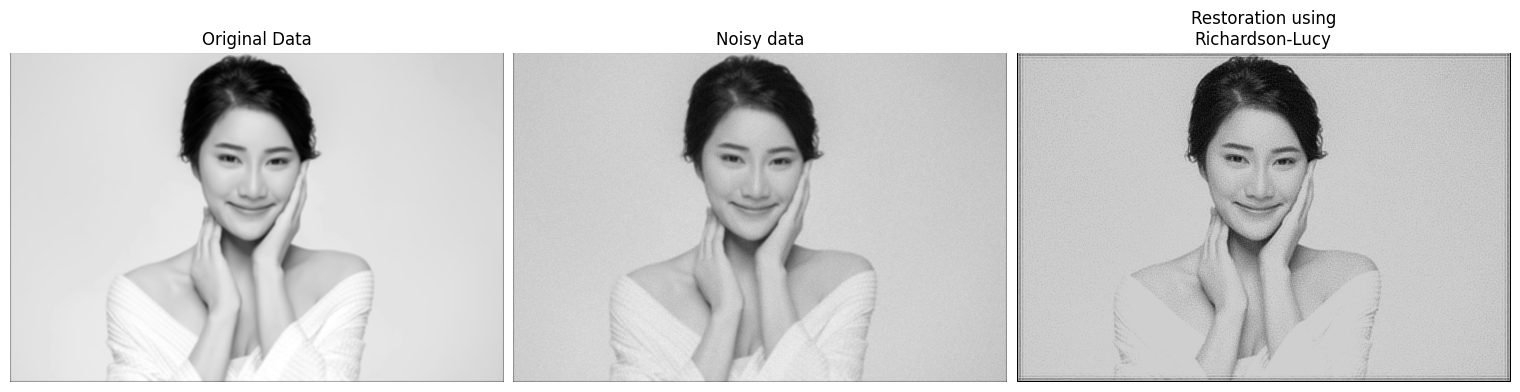

In [ ]:
#mengubah gambar blur / noise menjadi tidak noise
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, restoration
import cv2
from scipy.signal import convolve2d as conv2
from skimage import io
from skimage.color import rgb2gray

#RGB to Greyscale
asli = io.imread("deteksiwajah.jpg") #open read image di file local
astro = rgb2gray(asli)

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=40, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,top=0.9, bottom=0.05, left=0, right=1)
plt.show()

In [ ]:
# Load in color image for face detection
image = cv2.imread(pic_loc)

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make a copy of the original image to draw face detections on
image_copy = np.copy(image)

# Convert the image to gray
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Detect faces in the image using pre-trained face dectector
faces = face_cascade.detectMultiScale(gray_image, 1.25, 6)

NameError: ignored

NameError: ignored

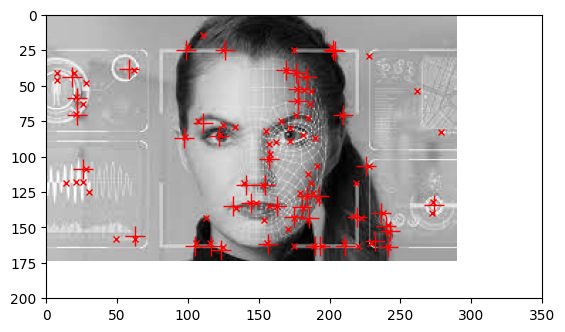

In [ ]:
import matplotlib.pyplot as plt
import cv2
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

img = cv2.imread('download (2).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#algoritma corner detection
tform = AffineTransform(scale=(1.2, 1.1), rotation=2, shear=0, translation=(100, 30)) #untuk memperikirkaan nilai piksel yang ada pada gambar
image = warp(data.checkerboard()[:70, :70], tform.inverse,output_shape=(100, 210)) #kordinat tranfsormasi

coords = corner_peaks(corner_harris(gray), min_distance=3, threshold_rel=0.01) #mennentukan titik kordinat gambar
coords_subpix = corner_subpix(gray, coords, window_size=11) #menentukan titik kordinat pada gambar pada gambar

fig, ax = plt.subplots()
ax.imshow(gray, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='red', marker='x',linestyle='None', markersize=5)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350,200, 0))

#alogirtma Haar Cascade Classifier
face = cv2.CascadeClassifier('../input/haarcascadefrontalfaces/haarcascade_frontalface_default.xml') #Deteksi wajah
eye = cv2.CascadeClassifier('../input/eyedetectxml/aye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    cv_warna = img[y:y+h, x:x+w]
    cv_gray = gray[y:y+h, x:x+w]

    eye = eye.detectMultiScale(cv_gray, 1.5, 3) #deteksi mata
    for (mx,my,mw,mh) in mata:
        cv2.rectangle(cv_warna, (mx,my), (mx+mw, my+mh), (255, 255, 0), 1)

print("[INFO] Found {0} Faces!".format(len(muka)))
print("[INFO] Found {0} ayes!".format(len(mata)))
plt.imshow(img)
plt.show()